In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data1 = pd.read_csv('ex1data1.txt', header=None)
data1.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data1.columns = ['Population', 'Profits']
data1.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The population is in 10,000s and the Profits are in $10,000s

In [4]:
inputs = data1.shape[0]
print(f"The data has {inputs} inputs")

The data has 97 inputs


In [5]:
data1.isnull().sum()

Population    0
Profits       0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

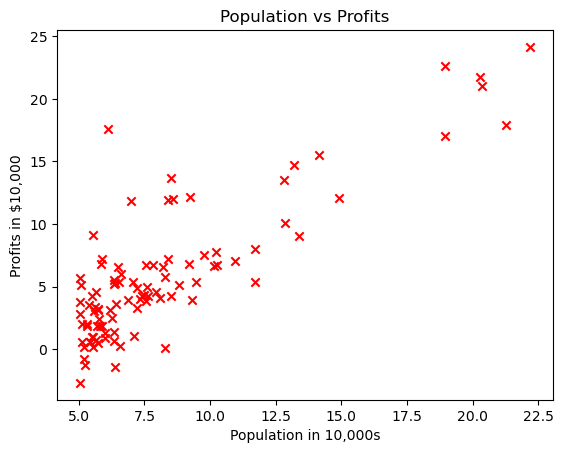

In [6]:
plt.scatter(data1['Population'], data1['Profits'], marker = 'x', c = 'r')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profits in $10,000')
plt.title('Population vs Profits')
plt.show

Relationship looks linear so, we're going for a linear model

#### Modeling by normal solution of model fitting

In [7]:
# loading the data into x_train and y_train variables
x_train = data1[['Population']].values
y_train = data1['Profits'].values

In [8]:
# creating a regression object
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [9]:
# viewing parameters
b = lm.intercept_
w = lm.coef_[0]
print(F"The slope of the linear model is {w:0.2f} and the y-intercept of the model is {b:0.2f}")

The slope of the linear model is 1.19 and the y-intercept of the model is -3.90


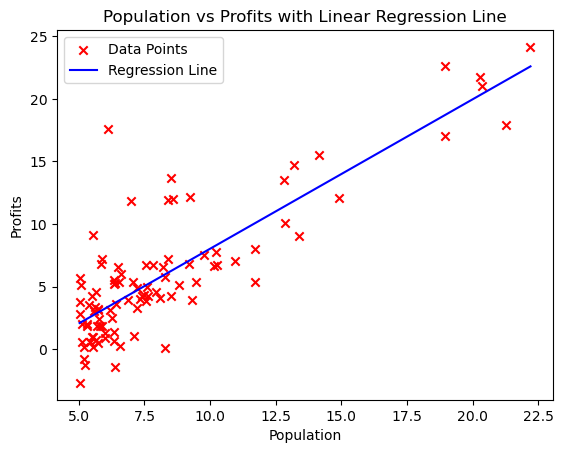

In [10]:
# visualizing the model
plt.scatter(x_train, y_train, color='red', marker='x', label='Data Points')

# Create the regression line
x_range = np.linspace(x_train.min(), x_train.max(), 100)
y_pred = lm.predict(x_range.reshape(-1, 1))

# Plot the regression line
plt.plot(x_range, y_pred, color='blue', label='Regression Line')
plt.xlabel('Population')
plt.ylabel('Profits')
plt.title('Population vs Profits with Linear Regression Line')
plt.legend()
plt.show()

In [11]:
#using the model for prediction
#if the new city has a population of 75360, what amount could be expected to be made as profit?
w = 1.19 #coefficient
b = -3.90 #intercept
print(f"The expected profit to be made for a city with a population of 75360, would be:\n = ${(((w * 7.536) + b) * 10000):0.0f}")

The expected profit to be made for a city with a population of 75360, would be:
 = $50678


In [12]:
print(f"The expected profit to be made for a city with a population of 75360, would be:\n = ${(((w * 2.13) + b) * 10000):0.0f}")

The expected profit to be made for a city with a population of 75360, would be:
 = $-13653


### Alternatively
#### We could set our parameters and use gradient descent to optimize the model with the following logic
1. Compute cost with ***compute_cost*** function, which calculates the cost function (mean squared error) **J** using parameters **w** and **b**. It tracks the reduction in error as parameters are updated
2. Compute gradients with ***compute_gradient*** function, which calculates the gradient of the cost function with respect to parameters **w** and **b**. The gradients are used to indicate how much the cost function changes with small adjustments to parameters, and the gradient values are used in updating parameters
3. Implement GD with ***gradient_descent*** function, which updates the parameters using the gradient values and a selected learning rate. The **J_history** uses the ***cost_function*** function to track the cost at every iteration, and the **w_history** tracks the progress in the optimization
4. Initialize parameters where the starting parameters are selected together with the learning rate and number of iterations to determine the starting point and speed of parameter updating
5. Run GD where the initialized parameters, learning rate, and number of iterations are fed into the ***gradient_descent*** function that uses both ***compute_gradient*** and ***compute_cost*** to iteratively update the parameters, reducing the cost function, and finding the best parameters
6. Calculate final cost
7. Make predictions

In [13]:
# compute cost
def compute_cost(x, y, w, b):
    m = len(y)
    cost = 0
    for i in  range (m):
        prediction = w * x[i] + b
        squ_error = (prediction - y[i]) **2
        cost = cost + squ_error
    total_cost = cost / (2 * m)
    return total_cost

In [14]:
# computing gradient value that is multiplied by the learning rate, and then the product is subtracted from the old parameter to get an updated parameter
def compute_gradient(x, y, w, b):
    m = len(y)
    dj_dw = 0
    dj_db = 0
    for i in range (m):
        prediction = w * x[i] + b
        dj_dw_i = (prediction - y[i]) * x[i]
        dj_db_i = prediction - y[i]
        dj_dw = dj_dw + dj_dw_i
        dj_db = dj_db + dj_db_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw, dj_db

In [15]:
import copy
import math
# using the gradient to update the parameters with gradient descent
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, learning_rate, iterations):
    m = len(y)
    j_history = []
    p_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        
        if i < 10000:
            cost = cost_function(x, y, w, b)
            j_history.append(cost)
            p_history.append([w,b])
            
        if i% math.ceil(iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {j_history[-1].item():8.2f}   ") 
    
    return w, b, j_history, p_history, w_history        

In [18]:
#initializing parameters and running gradient descent
w_in = 0.0
b_in = 0.0
x_train = x_train.flatten()
learning_rate = 0.01
iterations = 2000
w, b, j_history, p_history, w_history = gradient_descent(x_train, y_train, w_in, b_in, compute_cost, compute_gradient, learning_rate, iterations)
print(f"w,b found by gradient descent:, {w:0.2f}, {b:0.2f}")

Iteration    0: Cost     6.74   
Iteration  200: Cost     5.17   
Iteration  400: Cost     4.82   
Iteration  600: Cost     4.64   
Iteration  800: Cost     4.56   
Iteration 1000: Cost     4.52   
Iteration 1200: Cost     4.50   
Iteration 1400: Cost     4.49   
Iteration 1600: Cost     4.48   
Iteration 1800: Cost     4.48   
w,b found by gradient descent:, 1.18, -3.79


### Visualizations

#### The learning curve

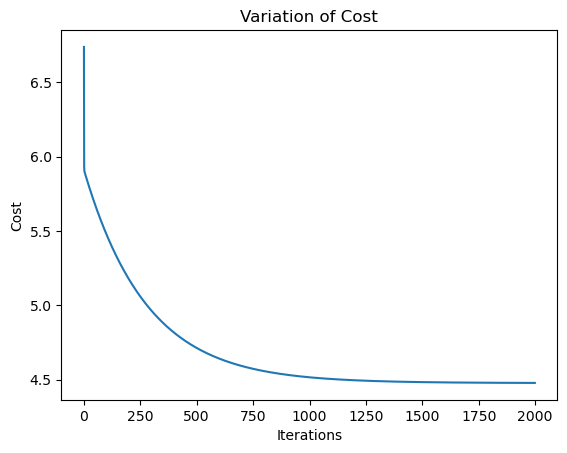

In [52]:
plt.plot(j_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Variation of Cost')
plt.savefig('learning_rate.png', dpi = 300, bbox_inches='tight')
plt.show()

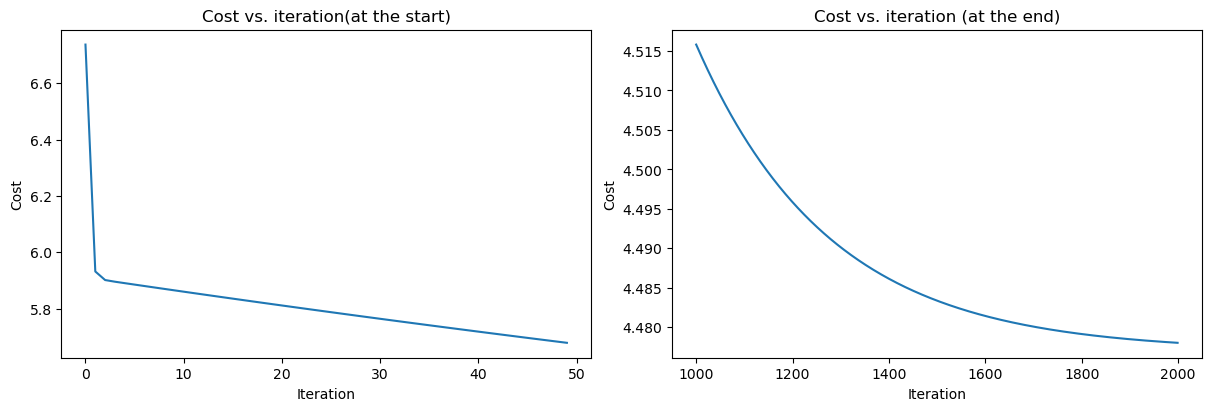

In [53]:
# plotING cost versus iteration at the start and at the end 
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_history[:50])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
ax1.set_title("Cost vs. iteration(at the start)")
ax2.set_title("Cost vs. iteration (at the end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost') 
ax1.set_xlabel('Iteration')
ax2.set_xlabel('Iteration') 
plt.savefig('learning_rate2.png', dpi=300, bbox_inches='tight')
plt.show()

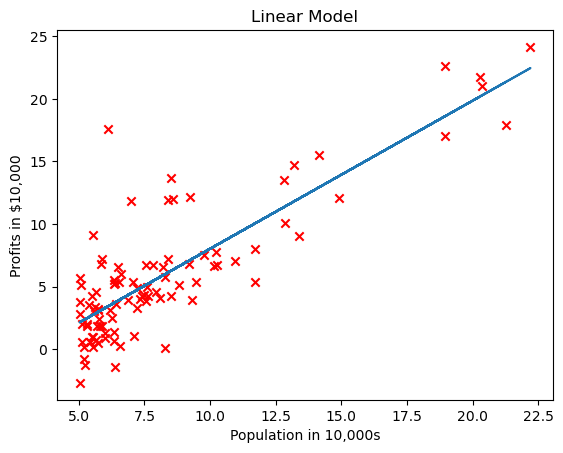

In [54]:
plt.scatter(x_train, y_train, marker='x', c='r', label='Training Data')

# Calculate model predictions
y_pred = w * x_train + b

plt.plot(x_train, y_pred, label='Linear Model')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profits in $10,000')
plt.title('Linear Model')
plt.savefig('linear_model1.png', dpi=300, bbox_inches='tight')
plt.show()

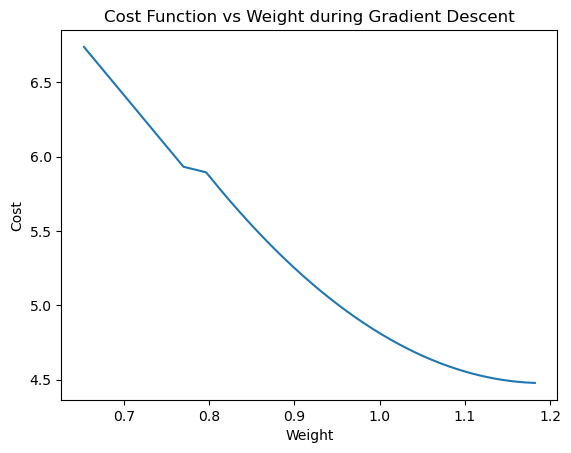

In [55]:
# extracting w and b values from p_history
w_values = [p[0] for p in p_history]
b_values = [p[1] for p in p_history]

# cost vs w
plt.plot(w_values, j_history)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.title('Cost Function vs Weight during Gradient Descent')
plt.savefig('cost_vs_w.png', dpi=300, bbox_inches='tight')
plt.show()

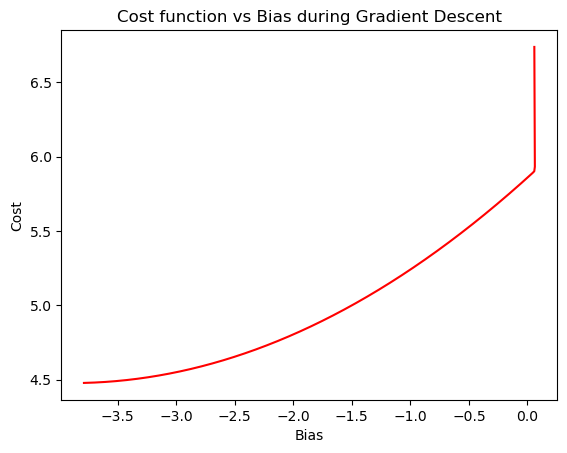

In [56]:
# cost vs b
plt.plot(b_values, j_history, c='r')
plt.xlabel('Bias')
plt.ylabel('Cost')
plt.title('Cost function vs Bias during Gradient Descent')
plt.savefig('cost_vs_b.png', dpi=300, bbox_inches='tight')
plt.show()

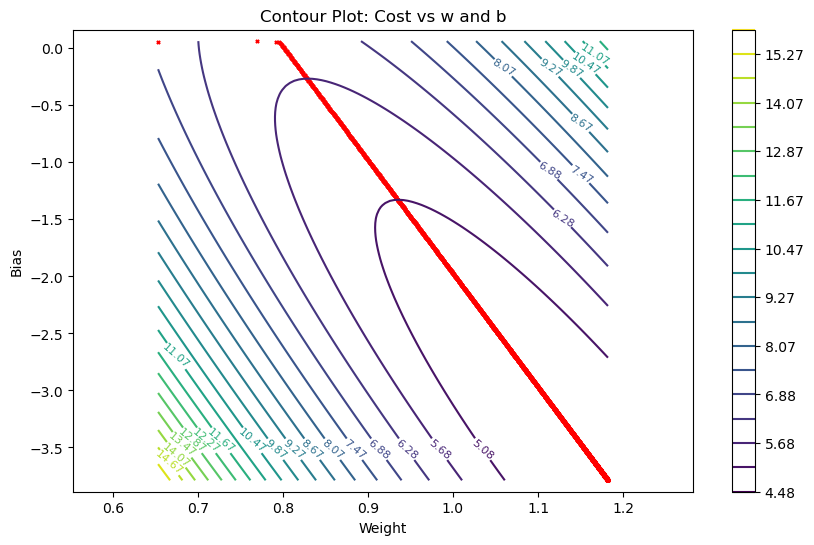

In [51]:
# defining the range for w and b
w_range = np.linspace(min(w_values), max(w_values), 100)
b_range = np.linspace(min(b_values), max(b_values), 100)

# creating a meshgrid for w and b
W, B = np.meshgrid(w_range, b_range)

k = W.shape[0]
n = W.shape[1]

# calculating the cost for each combination of w and b
Z = np.zeros(W.shape)
for i in range(k):
    for j in range(n):
        Z[i, j] = compute_cost(x_train, y_train, W[i, j], B[i, j])

plt.figure(figsize=(10, 6))

# adjusting contour levels with linear spacig
levels = np.linspace(Z.min(), Z.max(), 20)
cp = plt.contour(W, B, Z, levels=levels, cmap='viridis')

plt.clabel(cp, inline=True, fontsize=8)
plt.colorbar(cp)

plt.scatter(w_values, b_values, color='r', marker='x', s=5)

# Add title and axis labels
plt.title('Contour Plot: Cost vs w and b')
plt.xlabel('Weight')
plt.ylabel('Bias')

# Adjust axis limits for better focus
plt.xlim(min(w_values) - 0.1, max(w_values) + 0.1)
plt.ylim(min(b_values) - 0.1, max(b_values) + 0.1)

# Save and display the plot
plt.savefig('contour_plot2.png', dpi=300, bbox_inches='tight')
plt.show()